# Explore here

**Datos socio demográficos y de recursos de salud a nivel de condado de EE. UU. (2018-2019)**


Se han recopilado datos socio demográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.

Para ello, es necesario que establezcas una variable objetivo ("Obesity_prevalence") para llevar a cabo el análisis.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
medical_usa=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')
medical_usa.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [22]:
medical_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


Revisar si existen id duplicados

In [29]:
medical_usa.drop("fips", axis = 1).duplicated().sum()

np.int64(0)

Categorizamos las variables que sean de tipo "object"

In [30]:

# Identificar columnas categóricas
categorical_columns = medical_usa.select_dtypes(include=['object']).columns

# Aplicar factorization a cada columna categórica
for col in categorical_columns:
    medical_usa[col] = pd.factorize(medical_usa[col])[0]  # Asigna valores numéricos únicos

# Mostrar las primeras filas
medical_usa.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [31]:
medical_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


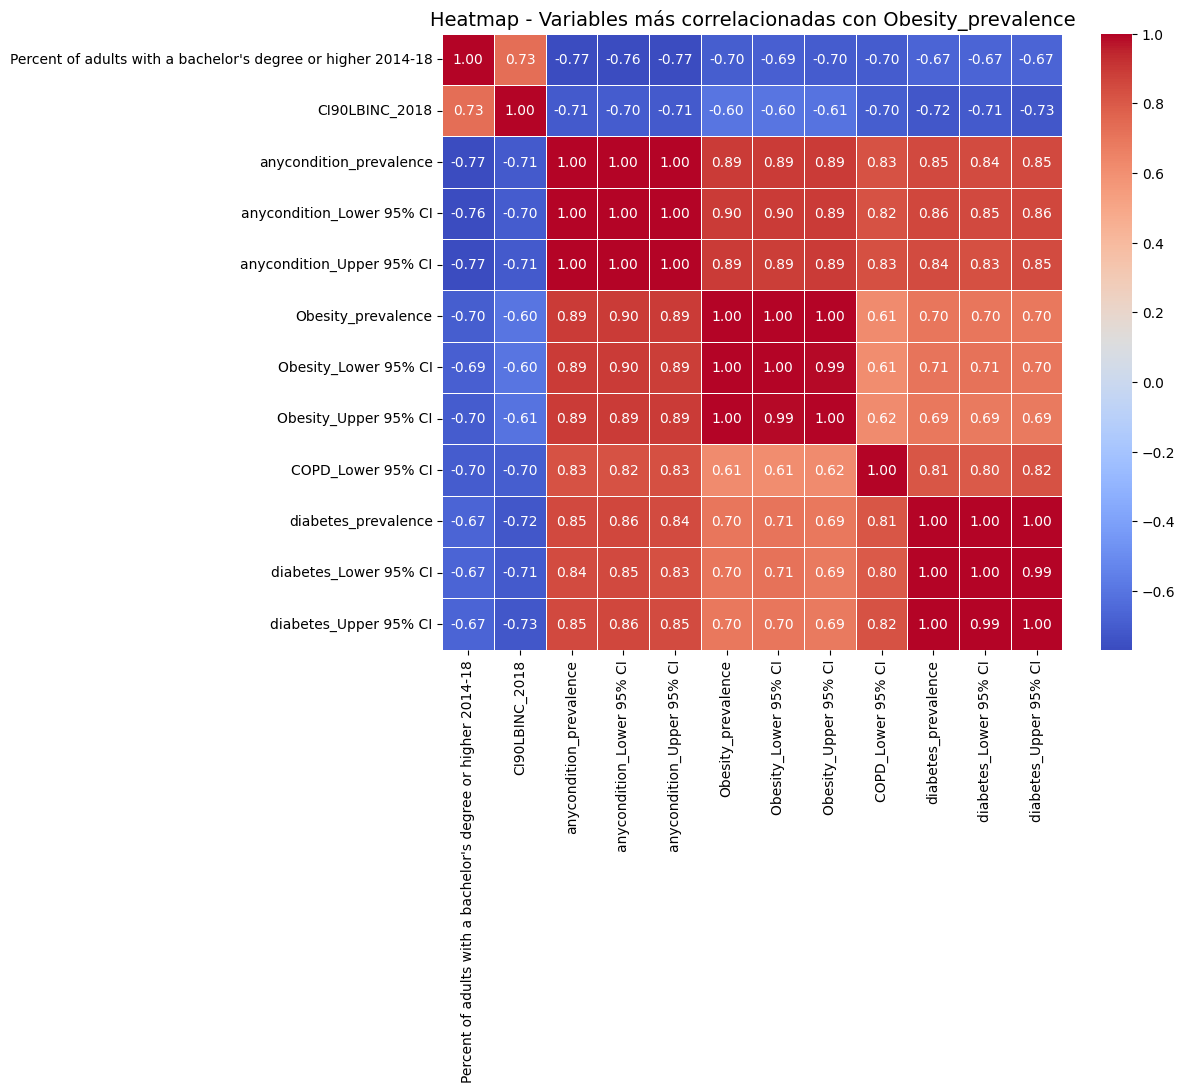

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la correlación de todas las variables con "Obesity_prevalence"
correlation = medical_usa.corr()["Obesity_prevalence"].abs()

# Seleccionar solo las variables con correlación alta (mayor a 0.5 por ejemplo)
correlacion_fuerte = correlation[correlation > 0.6].index

# Crear un heatmap solo con estas variables
plt.figure(figsize=(10, 8))
sns.heatmap(medical_usa[correlacion_fuerte].corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Título
plt.title("Heatmap - Variables más correlacionadas con Obesity_prevalence", fontsize=14)

# Mostrar el gráfico
plt.show()


Con ayuda del heatmap podemos observar la fuerte relacion que existe entre las personas que padecen de obesidad y otras enfermedades como la diabetes

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = medical_usa.drop(columns=["Obesity_prevalence"])
y = medical_usa["Obesity_prevalence"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_regresion_lineal = LinearRegression()
model_regresion_lineal.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred_regresion = model_regresion_lineal.predict(X_test)
y_pred_regresion

array([37.0009779 , 29.71610774, 43.47314697, 30.62420943, 25.10725717,
       29.16661179, 33.81745478, 43.17211324, 31.6102825 , 27.48589538,
       36.67809977, 37.46543639, 31.86800324, 38.72131531, 31.92136956,
       36.21651789, 33.92195287, 39.21601964, 43.62783004, 30.45919715,
       38.06479253, 36.46675632, 31.43207261, 38.95357483, 37.72696446,
       28.31029751, 20.73703635, 37.07466508, 34.08174283, 45.75744346,
       43.20829571, 47.35682888, 35.37346616, 33.56464686, 31.37167419,
       39.07289037, 35.86586313, 31.76503952, 38.23108764, 32.81252878,
       42.42104524, 36.52115958, 35.2698374 , 35.76318056, 32.56828142,
       38.92389622, 39.91200114, 31.56457041, 37.062671  , 38.84271667,
       28.63407009, 42.91703846, 32.41740769, 38.00631239, 39.7176692 ,
       45.51602041, 29.18554188, 36.17056801, 36.52724167, 35.37263618,
       27.17925887, 31.0811675 , 42.47430895, 26.63035764, 30.61935317,
       32.41675744, 38.52542935, 35.87557658, 33.0179591 , 33.13

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_regresion)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_regresion)}")

Error cuadrático medio: 0.0034898532829785115
Coeficiente de determinación: 0.9998309972584646


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso

X = medical_usa.drop(columns=["Obesity_prevalence"])
y = medical_usa["Obesity_prevalence"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_lasso= Lasso(alpha=0.1, max_iter=300)
modelo_lasso.fit(X_train, y_train)


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.557e+02, tolerance: 5.108e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, max_iter=300)

In [35]:
y_pred = modelo_lasso.predict(X_test)
y_pred

array([37.03034989, 29.74760224, 43.4280712 , 30.60598288, 25.15520609,
       29.22680616, 33.81824508, 43.10205042, 31.64751657, 27.58284136,
       36.6427931 , 37.45469596, 31.89226281, 38.71164452, 31.9528312 ,
       36.23259378, 33.87187492, 39.21565634, 43.61065713, 30.53128578,
       38.08390914, 36.44260287, 31.41547411, 38.95056577, 37.90987362,
       28.35922195, 20.85774205, 37.02076142, 34.05205463, 45.68981688,
       43.19967964, 47.29454146, 35.3745951 , 33.55677576, 31.34538211,
       39.05896031, 35.88652081, 31.7457013 , 38.18268887, 32.8177738 ,
       42.40197315, 36.54989042, 35.25379383, 35.73651669, 32.57041911,
       38.86960673, 39.84784262, 31.61361337, 37.09673145, 38.80035064,
       28.6419803 , 42.90298548, 32.45753475, 38.03578244, 39.74179487,
       45.45522694, 29.25155753, 36.15404618, 36.47571911, 35.33877559,
       27.1793874 , 31.11923149, 42.38461877, 26.62271005, 30.68355407,
       32.45416521, 38.48645512, 35.82600829, 33.02869312, 33.15

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 0.00676461568997275
Coeficiente de determinación: 0.9996724106991504


In [45]:
print(f"Intercepto (a): {modelo_lasso.intercept_}")
print(f"Coeficientes (b1, b2): {modelo_lasso.coef_}")

Intercepto (a): 0.594004791149132
Coeficientes (b1, b2): [ 3.56138041e-07 -2.87775921e-06 -4.57688259e-07  0.00000000e+00
  6.16011710e-07  0.00000000e+00  1.64089725e-06 -0.00000000e+00
 -1.05084370e-06 -0.00000000e+00  5.16627341e-07  0.00000000e+00
 -5.32305794e-07  0.00000000e+00 -5.04046502e-06 -0.00000000e+00
 -2.31466326e-06 -0.00000000e+00  6.40739823e-06 -0.00000000e+00
  4.10463428e-07  0.00000000e+00 -2.32275877e-07  0.00000000e+00
 -9.74499199e-07 -0.00000000e+00  1.88153010e-06 -0.00000000e+00
 -1.47044280e-05 -0.00000000e+00  6.63563816e-06 -0.00000000e+00
 -2.86935074e-07 -3.34981229e-06 -3.00422597e-06  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  7.91599303e-07 -2.48128668e-06  1.64012344e-06
  8.74502524e-07  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -3.09140327e-06 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -4.92851724e-07 -1.83879216e-06  3.14124858e-06
  1.79044519e-07 -4.67662313e-09 

El modelo explica casi en su totalidad el Dataframe
el modelo tiene muy buenas predicciones, no hubo necesidad de optimizarlo